In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])


In [14]:
print("Statistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [15]:
print("\nDistribusi Kelas:")
print(df['target_name'].value_counts())



Distribusi Kelas:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


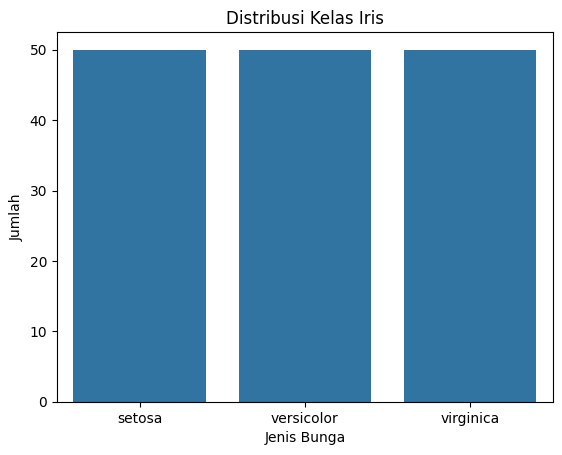

In [16]:
sns.countplot(x='target_name', data=df)
plt.title('Distribusi Kelas Iris')
plt.xlabel('Jenis Bunga')
plt.ylabel('Jumlah')
plt.show()


In [17]:
print("\nApakah ada nilai kosong?")
print(df.isnull().sum())



Apakah ada nilai kosong?
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

X = df[iris.feature_names]
y = df['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)


In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("\nAkurasi Model: {:.2f}%".format(akurasi * 100))  # Hasil: 96.67%
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)



Akurasi Model: 96.67%

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [23]:
print("Interpretasi:")
print("Model memiliki akurasi tinggi dan hanya satu kesalahan klasifikasi dari Versicolor ke Virginica.")

Interpretasi:
Model memiliki akurasi tinggi dan hanya satu kesalahan klasifikasi dari Versicolor ke Virginica.
